<a href="https://colab.research.google.com/github/batra-ayush/PyTorch-Examples/blob/main/WineDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# list number of unique values per column

for i in data.keys():
  print(f'{i} has {len(np.unique(data[i]))} values')


fixed acidity has 96 values
volatile acidity has 143 values
citric acid has 80 values
residual sugar has 91 values
chlorides has 153 values
free sulfur dioxide has 60 values
total sulfur dioxide has 144 values
density has 436 values
pH has 89 values
sulphates has 96 values
alcohol has 65 values
quality has 6 values


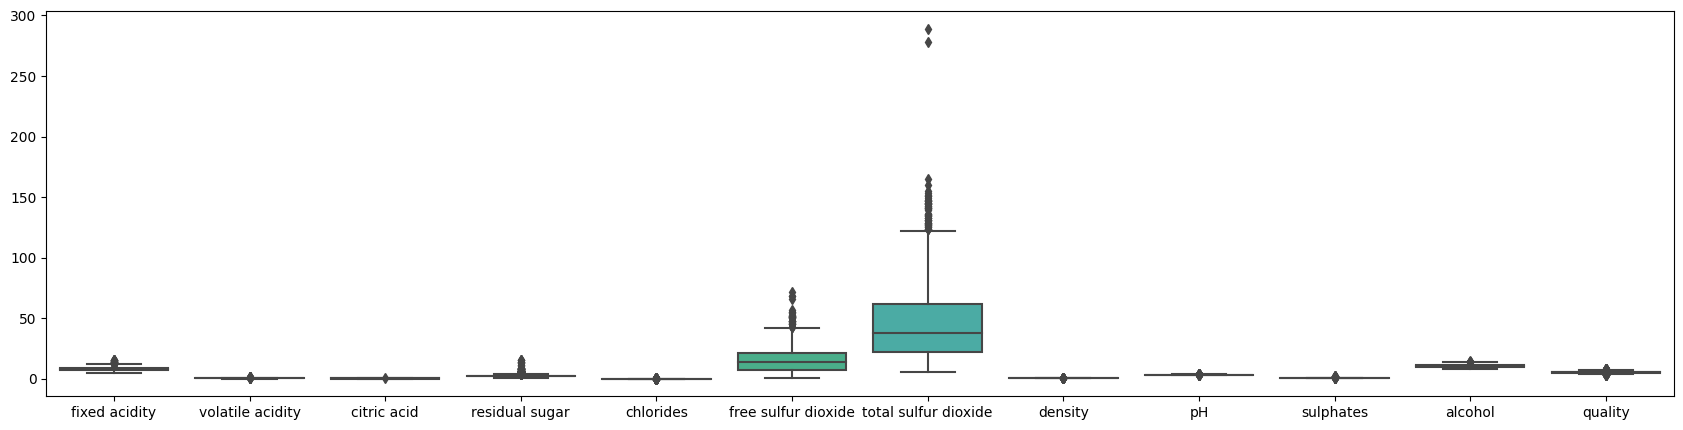

In [4]:
plt.figure(figsize=(21,5))
ax=sns.boxplot(data=data)


In [5]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

for col in cols2zscore:
  meanval = np.mean(data[col])
  stdev = np.std(data[col],ddof=1)
  data[col] = (data[col]-meanval)/stdev

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.688594e-16,-1.066481e-16,-1.110917e-16,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


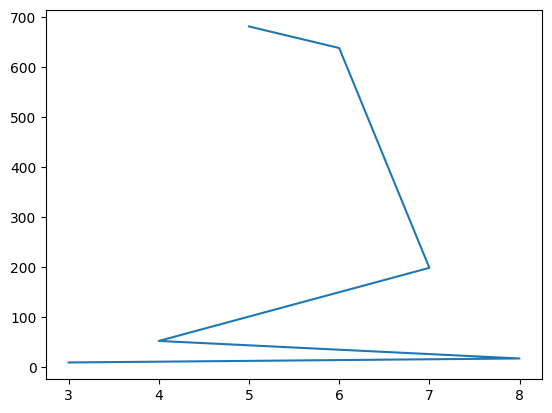

In [6]:
plt.plot(data['quality'].value_counts())

In [7]:
#binarize qulity

data['boolquality'] = 0
data['boolquality'][data['quality']>5] = 1
data

<ipython-input-7-6ab6ca876f02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolquality'][data['quality']>5] = 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolquality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5,0
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,5,0
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,5,0
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,6,1
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,5,0
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,6,1
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,6,1
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,5,0


In [8]:
# convert from pandas dataframe to tensor
dataT = torch.tensor(data[cols2zscore].values).float()
labelsT = torch.tensor(data['boolquality'].values).float()

labelsT = labelsT[:,None]


In [9]:
labelsT

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])

In [10]:
dataT

tensor([[-0.5282,  0.9616, -1.3910,  ...,  1.2882, -0.5790, -0.9599],
        [-0.2985,  1.9668, -1.3910,  ..., -0.7197,  0.1289, -0.5846],
        [-0.2985,  1.2967, -1.1857,  ..., -0.3311, -0.0481, -0.5846],
        ...,
        [-1.1600, -0.0995, -0.7237,  ...,  0.7053,  0.5419,  0.5415],
        [-1.3897,  0.6544, -0.7750,  ...,  1.6769,  0.3059, -0.2092],
        [-1.3323, -1.2165,  1.0217,  ...,  0.5110,  0.0109,  0.5415]])

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(dataT,labelsT,test_size=0.2)
train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data, test_labels)

batchsize = 64
train_loader =  DataLoader(train_data,batch_size=64,shuffle=True) ##drop last drops the last batch if it is less than batchsize
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [12]:
train_loader.tensors[0].shape

AttributeError: ignored

In [13]:
class theClassforWine(nn.Module):
  def __init__(self,dropoutrate):
    super().__init__()
    self.input = nn.Linear(11,16)
    self.hidden1 = nn.Linear(16,32)
    self.hidden2 = nn.Linear(32,32)
    self.hidden3 = nn.Linear(32,32)
    self.output = nn.Linear(32,1)

    self.dr=dropoutrate

  def forward(self,x):
    x = self.input(x)
    x = F.relu(x)
    #x = F.dropout(x,p=self.dr,training=self.training)
    x = self.hidden1(x)
    x  = F.relu(x)
    x = self.hidden2(x)
    x = F.relu(x)
    x = self.hidden3(x)
    x = F.relu(x)
    #x = F.dropout(x,p=self.dr,training=self.training)
    x = self.output(x)
    return x

In [14]:
def createANewModel(dropoutrate):
  AnnIris = theClassforWine(dropoutrate)
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(AnnIris.parameters(),lr=.05)
  return AnnIris, lossfun, optimizer

In [15]:
numepochs = 500
dropoutrate = .05
batchaccuracy = []
epochaccuracy = []

AnnIris,lossfun, optimizer = createANewModel(dropoutrate)

for epochi in range(numepochs):
  batchaccuracy = []
  for X,Y in train_loader:
    yHat = AnnIris(X)
    loss = lossfun(yHat,Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    batchaccuracy.append(torch.mean(((yHat>0.5) == Y).float()).item())
  epochaccuracy.append(np.mean(batchaccuracy))

For Binary Classification, we use BCE as loss function. This function includes Sigmoid as activation function.
To build a binary classification neural network you need to use the sigmoid activation function on its final layer together with binary cross-entropy loss. The final layer size should be 1. Such a neural network will output a probability p that the input belongs to class 1 and 1-p that the input belongs to class 0
Hence while calculating accuracy, we check if the predicted value >0.5 , if yes then it implies model is predicting 1 or else model is predictig 0 as quality.

Batch accuracy calculates the accuracy of the whole batch.


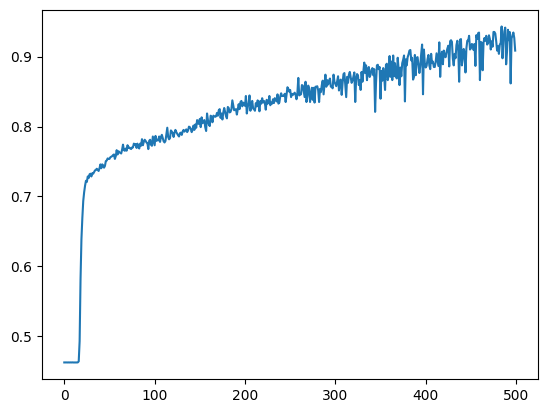

In [16]:
plt.plot(epochaccuracy)

In [41]:
finalacc = []
final_acc = []
for x,y in test_loader:
  ypred = AnnIris(x)
  loss = lossfun(ypred,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  final_acc.append(torch.mean(((ypred>0.5) == y).float()).item())



In [42]:
final_acc

[0.8031250238418579]

In [19]:
100*torch.mean(x.float())

tensor(0.1033)

In [ ]:
numepochs = 1

def trainTheModel():
  trainAcc = []
  testAcc = []

  for epochi in range(numepochs):
    AnnIris.train()
    batchAcc = []
   # for X,Y in train_loader:
    X,Y = next(iter(train_loader))
    yHat = AnnIris(X)
    loss = lossfun(yHat,Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(yHat.shape)
    print(Y.shape)
    batchAcc.append(100*torch.mean((yHat == Y).float()).item())
    trainAcc.append(np.mean(batchAcc))
  AnnIris.eval()
  X,Y = next(iter(test_loader))
  predlabel = (AnnIris(X)>0)
  testAcc.append(100*torch.mean((predlabel == Y).float()).item())
  return trainAcc, testAcc

In [ ]:
dropoutrate = .05

AnnIris,lossfun, optimizer = createANewModel(dropoutrate)
trainacc,testacc = trainTheModel()

In [ ]:
train_loader

In [ ]:
for X,Y in train_loader:
  print(Y[0,0])


In [ ]:
np.mean(trainacc)

In [ ]:
testacc

In [ ]:
testAcc = []
for X,y in test_loader:
  ypred = AnnIris(X)
  testAcc.append((100*torch.mean((torch.argmax(ypred,axis=1) == y).float())).item())



In [ ]:
testAcc

In [ ]:
accpct = 100*(torch.mean(accuracy.float()))
accpct